In [ ]:
!python --version

Python 3.7.10


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
dataset = pd.read_csv('./pima-indians-diabetes.csv',
                     names=['임신횟수', '포도당농도', '혈압', '피부주름두께', '인슐린', '체질량', '혈통', '나이', '결과'])

# PyCaret을 통해 예측해 봅시다

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266kB 11.8MB/s 
     |████████████████████████████████| 14.2MB 314kB/s 
     |████████████████████████████████| 1.7MB 41.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 102kB 11.2MB/s 
     |████████████████████████████████| 6.8MB 23.3MB/s 
     |████████████████████████████████| 245kB 45.6MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 
     |████████████████████████████████| 215kB 50.0MB/s 
     |████████████████████████████████| 2.0MB 42.0MB/s 
     |████████████████████████████████| 276kB 56.2MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 153kB 27.8MB/s 
     |████████████████████████████████| 378kB 39.7MB/s 
     |████████████████████████████████| 163kB 46.7MB/s 
     |████████████████████████████████| 1.1MB 33.4M

In [ ]:
from pycaret.classification import *

In [ ]:
exp_01 = setup(data = dataset,
                target = '결과',
                numeric_features=["임신횟수"],
                train_size = 0.8,
                normalize=True,
                session_id=123,
                n_jobs=1)

,Description,Value
0,session_id,123
1,Target,결과
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
compare_models(sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7688,0.8243,0.5524,0.7141,0.6185,0.4573,0.4680,0.017
lda,Linear Discriminant Analysis,0.7688,0.8236,0.5381,0.7282,0.6127,0.4539,0.4686,0.015
gbc,Gradient Boosting Classifier,0.7622,0.8191,0.5952,0.6892,0.6306,0.4576,0.4663,0.164
rf,Random Forest Classifier,0.7606,0.8176,0.5810,0.6930,0.6229,0.4506,0.4610,0.253
ada,Ada Boost Classifier,0.7426,0.8119,0.5524,0.6454,0.5849,0.4041,0.4117,0.127
nb,Naive Bayes,0.7558,0.8111,0.5952,0.6673,0.6220,0.4440,0.4508,0.014
et,Extra Trees Classifier,0.7607,0.8075,0.5619,0.6930,0.6151,0.4450,0.4540,0.204
qda,Quadratic Discriminant Analysis,0.7361,0.8067,0.5333,0.6386,0.5765,0.3885,0.3946,0.015
lightgbm,Light Gradient Boosting Machine,0.7347,0.7849,0.5619,0.6304,0.5868,0.3942,0.4006,0.061
knn,K Neighbors Classifier,0.7267,0.7579,0.5095,0.6337,0.5564,0.3637,0.3733,0.018


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8065,0.8920,0.7143,0.7143,0.7143,0.5679,0.5679
1,0.7097,0.7526,0.5714,0.5714,0.5714,0.3519,0.3519
2,0.7581,0.8223,0.5238,0.6875,0.5946,0.4266,0.4346
3,0.7742,0.8513,0.5238,0.7333,0.6111,0.4582,0.4711
4,0.7377,0.8155,0.4286,0.6923,0.5294,0.3613,0.3812
5,0.6885,0.7262,0.4286,0.5625,0.4865,0.2688,0.2739
6,0.7377,0.8417,0.4762,0.6667,0.5556,0.3768,0.3875
7,0.8361,0.8250,0.7143,0.7895,0.7500,0.6285,0.6302
8,0.8033,0.8190,0.5714,0.8000,0.6667,0.5326,0.5477
9,0.8361,0.8976,0.5714,0.9231,0.7059,0.6008,0.6340


In [ ]:
tuned_model = tune_model(model, optimize = "AUC", n_iter = 500)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8065,0.8897,0.7143,0.7143,0.7143,0.5679,0.5679
1,0.7258,0.7654,0.5714,0.6000,0.5854,0.3807,0.3810
2,0.7742,0.8188,0.5238,0.7333,0.6111,0.4582,0.4711
3,0.7581,0.8537,0.4762,0.7143,0.5714,0.4121,0.4286
4,0.7377,0.8167,0.4286,0.6923,0.5294,0.3613,0.3812
5,0.7049,0.7286,0.3810,0.6154,0.4706,0.2814,0.2970
6,0.7377,0.8393,0.4286,0.6923,0.5294,0.3613,0.3812
7,0.8197,0.8250,0.6667,0.7778,0.7179,0.5866,0.5903
8,0.8033,0.8262,0.5714,0.8000,0.6667,0.5326,0.5477
9,0.8525,0.8988,0.5714,1.0000,0.7273,0.6362,0.6830


In [ ]:
tuned_model

LogisticRegression(C=0.096, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

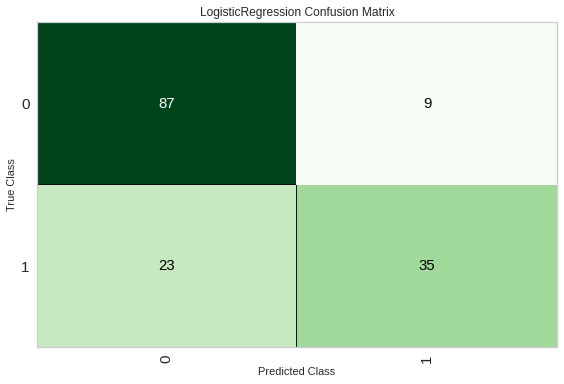

In [ ]:
plot_model(tuned_model, plot = 'confusion_matrix')

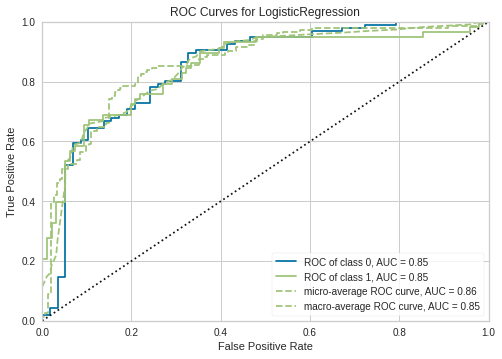

In [ ]:
plot_model(tuned_model, plot = 'auc')

In [ ]:
predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7922,0.8472,0.6034,0.7955,0.6863,0.5353,0.5467


,임신횟수,포도당농도,혈압,피부주름두께,인슐린,체질량,혈통,나이,결과,Label,Score
0,0.971245,1.909453,0.778518,0.025367,0.995093,0.481868,0.389415,1.528274,1,1,0.8427
1,-0.533915,0.189638,-0.559292,0.214537,1.732733,-0.595493,3.529649,-0.702444,0,0,0.6109
2,2.175372,0.539971,0.366884,-1.298829,-0.711253,0.127127,-0.124667,0.155524,0,1,0.5829
3,-0.533915,-1.275389,-0.456384,0.088423,-0.711253,-0.595493,-0.527261,-0.702444,0,0,0.9377
4,-1.135979,-1.179844,0.675609,0.655936,0.399650,0.784055,-0.703783,-0.874038,0,0,0.9068
...,...,...,...,...,...,...,...,...,...,...,...
149,-0.834947,-0.956905,-0.765109,0.277594,0.177469,-0.923957,-0.700686,-0.874038,0,0,0.9444
150,-0.533915,2.419027,0.058158,4.943809,-0.711253,0.324206,0.355349,2.472039,1,1,0.9004
151,0.068149,-0.702118,0.366884,-0.352975,-0.258004,-1.186728,-0.734752,-1.045632,0,0,0.9362
152,-0.533915,-1.243541,-0.868018,0.088423,0.310778,-0.490385,3.836240,-0.702444,0,0,0.8085


In [ ]:
final_model = finalize_model(tuned_model)

In [ ]:
final_model

LogisticRegression(C=0.096, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8182,0.8545,0.6724,0.8125,0.7358,0.5991,0.6053


,임신횟수,포도당농도,혈압,피부주름두께,인슐린,체질량,혈통,나이,결과,Label,Score
0,0.971245,1.909453,0.778518,0.025367,0.995093,0.481868,0.389415,1.528274,1,1,0.8592
1,-0.533915,0.189638,-0.559292,0.214537,1.732733,-0.595493,3.529649,-0.702444,0,0,0.5970
2,2.175372,0.539971,0.366884,-1.298829,-0.711253,0.127127,-0.124667,0.155524,0,1,0.6293
3,-0.533915,-1.275389,-0.456384,0.088423,-0.711253,-0.595493,-0.527261,-0.702444,0,0,0.9390
4,-1.135979,-1.179844,0.675609,0.655936,0.399650,0.784055,-0.703783,-0.874038,0,0,0.9194
...,...,...,...,...,...,...,...,...,...,...,...
149,-0.834947,-0.956905,-0.765109,0.277594,0.177469,-0.923957,-0.700686,-0.874038,0,0,0.9438
150,-0.533915,2.419027,0.058158,4.943809,-0.711253,0.324206,0.355349,2.472039,1,1,0.8953
151,0.068149,-0.702118,0.366884,-0.352975,-0.258004,-1.186728,-0.734752,-1.045632,0,0,0.9338
152,-0.533915,-1.243541,-0.868018,0.088423,0.310778,-0.490385,3.836240,-0.702444,0,0,0.8106
